In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


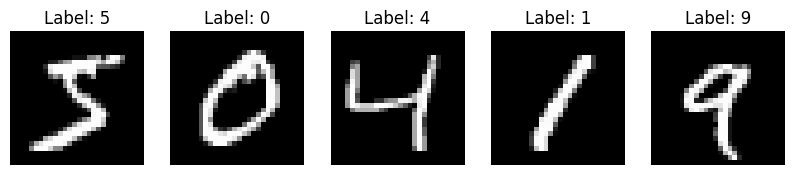

In [13]:
# Display 5 images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')  # Use grayscale for better visualization
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')  # Remove axis ticks
plt.show()

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

c:\Users\Domenick Dobbs\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=5)
# model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - accuracy: 0.8592 - loss: 0.4790
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step - accuracy: 0.9554 - loss: 0.1485
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - accuracy: 0.9669 - loss: 0.1100
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step - accuracy: 0.9735 - loss: 0.0872
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step - accuracy: 0.9787 - loss: 0.0703
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.9743 - loss: 0.0856


[0.07392903417348862, 0.9775000214576721]

In [14]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.9759 - loss: 0.0852
Test Loss: 0.0700
Test Accuracy: 0.9791


In [8]:
# Get training history
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 563us/step - accuracy: 0.9804 - loss: 0.0629
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.9817 - loss: 0.0543
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 561us/step - accuracy: 0.9831 - loss: 0.0504
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - accuracy: 0.9846 - loss: 0.0457
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - accuracy: 0.9855 - loss: 0.0425


In [10]:
# Extract loss and accuracy values from history
train_loss = history.history['loss']
train_acc = history.history['accuracy']

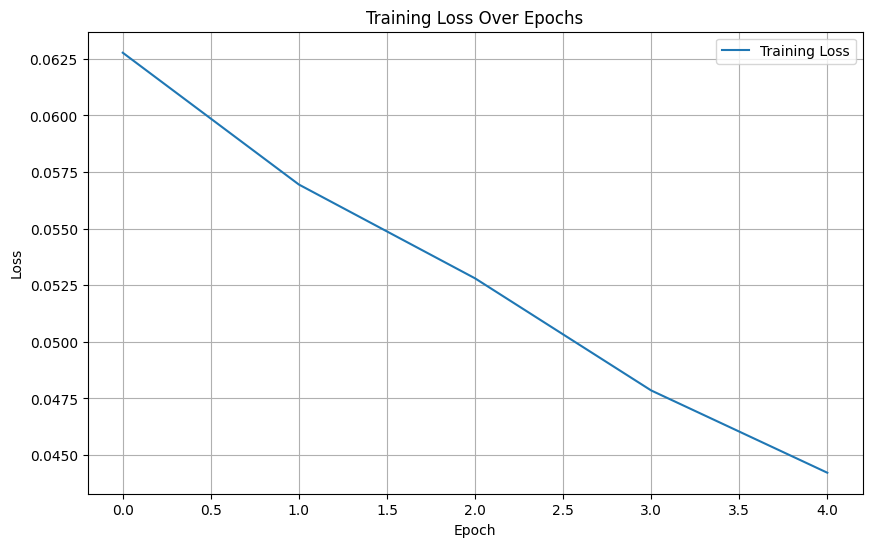

In [11]:
# Plot training loss
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(train_loss, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

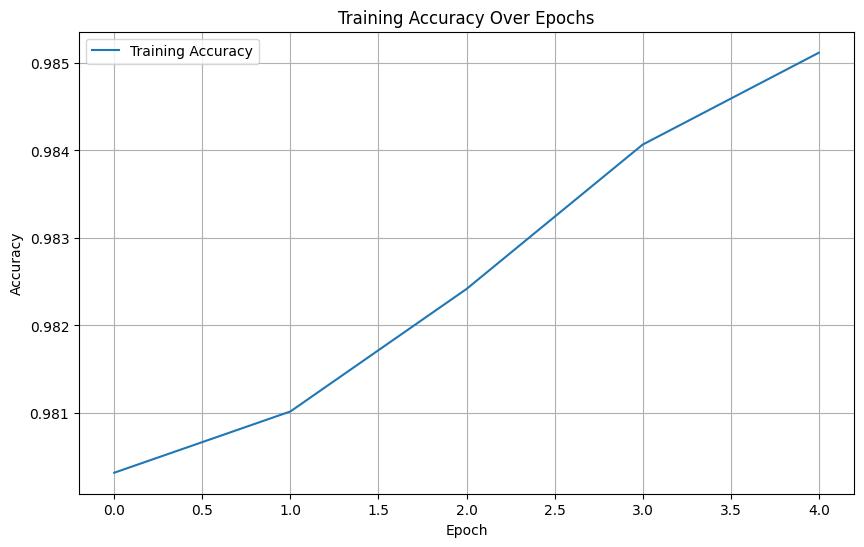

In [12]:
# Plot training accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()